# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [2]:
data_problem_definition = """
This is a supervised regression problem, with a continuous target variable, price.
After the features are standardized, linear, ridge, and lasso regression models 
will be used to predict the price. After selecting the best model, the
coefficients will be analyzed to produce a set of features ranked by predictive
power, indicating what drives the price of a car.
"""

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [4]:
# Load the vehicles dataset
vehicles = pd.read_csv('data/vehicles.csv')

# Basic dataset information
print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"\nDataset Shape: {vehicles.shape[0]:,} rows × {vehicles.shape[1]} columns")
print(f"\nColumn Names:")
for i, col in enumerate(vehicles.columns, 1):
    print(f"  {i:2d}. {col}")

print("\n" + "=" * 80)
print("DATA TYPES")
print("=" * 80)
print(vehicles.dtypes)

print("\n" + "=" * 80)
print("BASIC STATISTICS")
print("=" * 80)
display(vehicles.describe())

DATASET OVERVIEW

Dataset Shape: 426,880 rows × 18 columns

Column Names:
   1. id
   2. region
   3. price
   4. year
   5. manufacturer
   6. model
   7. condition
   8. cylinders
   9. fuel
  10. odometer
  11. title_status
  12. transmission
  13. VIN
  14. drive
  15. size
  16. type
  17. paint_color
  18. state

DATA TYPES
id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

BASIC STATISTICS


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [5]:
# Missing values analysis
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)
missing_data = vehicles.isnull().sum()
missing_pct = (missing_data / len(vehicles) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(f"\nTotal missing values: {vehicles.isnull().sum().sum():,}")
print(f"\nColumns with missing values ({len(missing_df)}):")
print(missing_df.to_string())

print("\n" + "=" * 80)
print("COMPLETE CASES")
print("=" * 80)
complete_cases = vehicles.dropna()
print(f"Rows with complete data: {len(complete_cases):,} ({len(complete_cases)/len(vehicles)*100:.2f}%)")

MISSING VALUES ANALYSIS

Total missing values: 1,215,152

Columns with missing values (14):
              Missing Count  Missing Percentage
size                 306361               71.77
cylinders            177678               41.62
condition            174104               40.79
VIN                  161042               37.73
drive                130567               30.59
paint_color          130203               30.50
type                  92858               21.75
manufacturer          17646                4.13
title_status           8242                1.93
model                  5277                1.24
odometer               4400                1.03
fuel                   3013                0.71
transmission           2556                0.60
year                   1205                0.28

COMPLETE CASES
Rows with complete data: 34,868 (8.17%)


In [6]:
# Categorical variables summary
print("=" * 80)
print("CATEGORICAL VARIABLES SUMMARY")
print("=" * 80)

categorical_cols = vehicles.select_dtypes(include=['object']).columns
print(f"\nCategorical columns ({len(categorical_cols)}): {list(categorical_cols)}")

for col in categorical_cols:
    if col != 'VIN':  # Skip VIN as it's likely unique identifiers
        print(f"\n{col.upper()}:")
        value_counts = vehicles[col].value_counts(dropna=False)
        print(f"  Unique values: {vehicles[col].nunique()}")
        print(f"  Top 10 values:")
        for val, count in value_counts.head(10).items():
            pct = (count / len(vehicles) * 100)
            print(f"    {val}: {count:,} ({pct:.2f}%)")

CATEGORICAL VARIABLES SUMMARY

Categorical columns (14): ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']

REGION:
  Unique values: 404
  Top 10 values:
    columbus: 3,608 (0.85%)
    jacksonville: 3,562 (0.83%)
    spokane / coeur d'alene: 2,988 (0.70%)
    eugene: 2,985 (0.70%)
    fresno / madera: 2,983 (0.70%)
    orlando: 2,983 (0.70%)
    bend: 2,982 (0.70%)
    omaha / council bluffs: 2,982 (0.70%)
    new hampshire: 2,981 (0.70%)
    kennewick-pasco-richland: 2,981 (0.70%)

MANUFACTURER:
  Unique values: 42
  Top 10 values:
    ford: 70,985 (16.63%)
    chevrolet: 55,064 (12.90%)
    toyota: 34,202 (8.01%)
    honda: 21,269 (4.98%)
    nissan: 19,067 (4.47%)
    jeep: 19,014 (4.45%)
    ram: 18,342 (4.30%)
    nan: 17,646 (4.13%)
    gmc: 16,785 (3.93%)
    bmw: 14,699 (3.44%)

MODEL:
  Unique values: 29649
  Top 10 values:
    f-150: 8,009 (1.88%)
    nan: 5,277 (1.24%

In [7]:
# Numerical variables summary
print("=" * 80)
print("NUMERICAL VARIABLES SUMMARY")
print("=" * 80)

numerical_cols = vehicles.select_dtypes(include=[np.number]).columns
print(f"\nNumerical columns ({len(numerical_cols)}): {list(numerical_cols)}")

print("\nDetailed Statistics:")
display(vehicles[numerical_cols].describe().T)

NUMERICAL VARIABLES SUMMARY

Numerical columns (4): ['id', 'price', 'year', 'odometer']

Detailed Statistics:


,count,mean,std,min,25%,50%,75%,max
id,426880.0,7.311487e+09,4.473170e+06,7.207408e+09,7.308143e+09,7.312621e+09,7.315254e+09,7.317101e+09
price,426880.0,7.519903e+04,1.218228e+07,0.000000e+00,5.900000e+03,1.395000e+04,2.648575e+04,3.736929e+09
year,425675.0,2.011235e+03,9.452120e+00,1.900000e+03,2.008000e+03,2.013000e+03,2.017000e+03,2.022000e+03
odometer,422480.0,9.804333e+04,2.138815e+05,0.000000e+00,3.770400e+04,8.554800e+04,1.335425e+05,1.000000e+07


In [8]:
# Data quality summary
print("=" * 80)
print("DATA QUALITY SUMMARY")
print("=" * 80)

print(f"\nTotal Records: {len(vehicles):,}")
print(f"Total Columns: {len(vehicles.columns)}")
print(f"Total Missing Values: {vehicles.isnull().sum().sum():,}")
print(f"Percentage of Missing Data: {(vehicles.isnull().sum().sum() / (len(vehicles) * len(vehicles.columns)) * 100):.2f}%")

print(f"\nDuplicate Records: {vehicles.duplicated().sum():,}")
if vehicles.duplicated().sum() > 0:
    print(f"Percentage Duplicates: {(vehicles.duplicated().sum() / len(vehicles) * 100):.2f}%")

# Check for potential issues
print("\nPotential Data Quality Issues:")
if 'price' in vehicles.columns:
    zero_price_pct = (vehicles['price'] == 0).sum() / len(vehicles) * 100
    if zero_price_pct > 1:
        print(f"  ⚠️  High percentage of zero prices: {zero_price_pct:.2f}%")
    
if 'year' in vehicles.columns:
    if vehicles['year'].notna().sum() > 0:
        current_year = pd.Timestamp.now().year
        future_years = (vehicles['year'] > current_year).sum()
        very_old_years = (vehicles['year'] < 1900).sum()
        if future_years > 0:
            print(f"  ⚠️  Future years detected: {future_years:,} records")
        if very_old_years > 0:
            print(f"  ⚠️  Very old years detected: {very_old_years:,} records")

if 'odometer' in vehicles.columns:
    if vehicles['odometer'].notna().sum() > 0:
        negative_odometer = (vehicles['odometer'] < 0).sum()
        if negative_odometer > 0:
            print(f"  ⚠️  Negative odometer values: {negative_odometer:,} records")

DATA QUALITY SUMMARY

Total Records: 426,880
Total Columns: 18
Total Missing Values: 1,215,152
Percentage of Missing Data: 15.81%

Duplicate Records: 0

Potential Data Quality Issues:
  ⚠️  High percentage of zero prices: 7.71%


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [9]:
# Start with a copy of the original dataset
vehicles_clean = vehicles.copy()

print("=" * 80)
print("DATA CLEANING PROCESS")
print("=" * 80)
print(f"\nInitial shape: {vehicles_clean.shape}")

# Step 1: Drop 'size', 'VIN', and 'state' columns
vehicles_clean = vehicles_clean.drop(columns=['size', 'VIN', 'state'])
print(f"\nAfter dropping 'size', 'VIN', and 'state' columns: {vehicles_clean.shape}")

# Step 2: Drop rows where 'model' or 'odometer' is null
initial_rows = len(vehicles_clean)
vehicles_clean = vehicles_clean.dropna(subset=['model', 'odometer', 'year'])
rows_dropped = initial_rows - len(vehicles_clean)
print(f"After dropping rows with null 'model', 'odometer', or 'year': {vehicles_clean.shape}")
print(f"  Rows dropped: {rows_dropped:,} ({rows_dropped/initial_rows*100:.2f}%)\n")

# Step 3: Set 'paint_color' and 'condition' null values to 'unknown'
vehicles_clean['paint_color'] = vehicles_clean['paint_color'].fillna('unknown')
vehicles_clean['condition'] = vehicles_clean['condition'].fillna('unknown')
print("=" * 80)
print("FILLING PAINT_COLOR AND CONDITION")
print("=" * 80)
print(f"\nAfter filling 'paint_color' and 'condition' nulls with 'unknown':")
print(f"  paint_color nulls: {vehicles_clean['paint_color'].isnull().sum()}")
print(f"  condition nulls: {vehicles_clean['condition'].isnull().sum()}")

DATA CLEANING PROCESS

Initial shape: (426880, 18)

After dropping 'size', 'VIN', and 'state' columns: (426880, 15)
After dropping rows with null 'model', 'odometer', or 'year': (416149, 15)
  Rows dropped: 10,731 (2.51%)

FILLING PAINT_COLOR AND CONDITION

After filling 'paint_color' and 'condition' nulls with 'unknown':
  paint_color nulls: 0
  condition nulls: 0


In [10]:
# Step 4: Impute missing values contextually

# Manufacturer, fuel, and type can be imputed from the model 
# Cylinders, transmission, and drive can be imputed from model and year

print("=" * 80)
print("STEP 4: CONTEXTUAL IMPUTATION")
print("=" * 80)

# 4a. Impute manufacturer from model
print("\n4a. Imputing manufacturer from model...")
model_to_manufacturer = vehicles_clean[vehicles_clean['manufacturer'].notna()] \
    .groupby('model')['manufacturer'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]).to_dict()
vehicles_clean['manufacturer'] = vehicles_clean['manufacturer'].fillna(
    vehicles_clean['model'].map(model_to_manufacturer)
)
print(f"  Manufacturers still missing: {vehicles_clean['manufacturer'].isnull().sum()}")

# 4b. Impute fuel from model
print("\n4b. Imputing fuel from model...")
model_to_fuel = vehicles_clean[vehicles_clean['fuel'].notna()] \
    .groupby('model')['fuel'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]).to_dict()
vehicles_clean['fuel'] = vehicles_clean['fuel'].fillna(
    vehicles_clean['model'].map(model_to_fuel)
)
print(f"  Fuel still missing: {vehicles_clean['fuel'].isnull().sum()}")

# 4c. Impute type from model
print("\n4c. Imputing type from model...")
model_to_type = vehicles_clean[vehicles_clean['type'].notna()] \
    .groupby('model')['type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]).to_dict()
vehicles_clean['type'] = vehicles_clean['type'].fillna(
    vehicles_clean['model'].map(model_to_type)
)
print(f"  Type still missing: {vehicles_clean['type'].isnull().sum()}")

# 4d. Impute cylinders from model and year
print("\n4d. Imputing cylinders from model and year...")
model_year_to_cylinders = vehicles_clean[vehicles_clean['cylinders'].notna()] \
    .groupby(['model', 'year'])['cylinders'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0])
model_year_to_cylinders_df = model_year_to_cylinders.reset_index()
model_year_to_cylinders_df.columns = ['model', 'year', 'cylinders_imputed']
vehicles_clean = vehicles_clean.merge(model_year_to_cylinders_df, on=['model', 'year'], how='left')
vehicles_clean['cylinders'] = vehicles_clean['cylinders'].fillna(vehicles_clean['cylinders_imputed'])
vehicles_clean = vehicles_clean.drop(columns=['cylinders_imputed'])
print(f"  Cylinders still missing: {vehicles_clean['cylinders'].isnull().sum()}")

# 4e. Impute transmission from model and year
print("\n4e. Imputing transmission from model and year...")
model_year_to_transmission = vehicles_clean[vehicles_clean['transmission'].notna()] \
    .groupby(['model', 'year'])['transmission'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0])
model_year_to_transmission_df = model_year_to_transmission.reset_index()
model_year_to_transmission_df.columns = ['model', 'year', 'transmission_imputed']
vehicles_clean = vehicles_clean.merge(model_year_to_transmission_df, on=['model', 'year'], how='left')
vehicles_clean['transmission'] = vehicles_clean['transmission'].fillna(vehicles_clean['transmission_imputed'])
vehicles_clean = vehicles_clean.drop(columns=['transmission_imputed'])
print(f"  Transmission still missing: {vehicles_clean['transmission'].isnull().sum()}")

# 4f. Impute drive from model and year
print("\n4f. Imputing drive from model and year...")
model_year_to_drive = vehicles_clean[vehicles_clean['drive'].notna()] \
    .groupby(['model', 'year'])['drive'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0])
model_year_to_drive_df = model_year_to_drive.reset_index()
model_year_to_drive_df.columns = ['model', 'year', 'drive_imputed']
vehicles_clean = vehicles_clean.merge(model_year_to_drive_df, on=['model', 'year'], how='left')
vehicles_clean['drive'] = vehicles_clean['drive'].fillna(vehicles_clean['drive_imputed'])
vehicles_clean = vehicles_clean.drop(columns=['drive_imputed'])
print(f"  Drive still missing: {vehicles_clean['drive'].isnull().sum()}")

print("\n" + "=" * 80)
print("STEP 4 COMPLETE: SUMMARY OF MISSING VALUES")
print("=" * 80)
missing_after = vehicles_clean.isnull().sum()
missing_after = missing_after[missing_after > 0].sort_values(ascending=False)
if len(missing_after) > 0:
    print("\nRemaining missing values:")
    for col, count in missing_after.items():
        pct = (count / len(vehicles_clean) * 100)
        print(f"  {col}: {count:,} ({pct:.2f}%)")
else:
    print("\nNo missing values remaining!")

STEP 4: CONTEXTUAL IMPUTATION

4a. Imputing manufacturer from model...
  Manufacturers still missing: 15547

4b. Imputing fuel from model...
  Fuel still missing: 1379

4c. Imputing type from model...
  Type still missing: 10098

4d. Imputing cylinders from model and year...
  Cylinders still missing: 56808

4e. Imputing transmission from model and year...
  Transmission still missing: 159

4f. Imputing drive from model and year...
  Drive still missing: 38468

STEP 4 COMPLETE: SUMMARY OF MISSING VALUES

Remaining missing values:
  cylinders: 56,808 (13.65%)
  drive: 38,468 (9.24%)
  manufacturer: 15,547 (3.74%)
  type: 10,098 (2.43%)
  title_status: 7,327 (1.76%)
  fuel: 1,379 (0.33%)
  transmission: 159 (0.04%)


In [26]:
# Analyze categorical features for ones that can be converted to numerical

# Get categorical features (object type columns, excluding 'model' and 'region' which are identifiers/names)
categorical_features = vehicles_clean.select_dtypes(include=['object']).columns.tolist()
# Exclude identifier-like columns
categorical_features = [col for col in categorical_features if col not in ['model', 'region']]

print("=" * 80)
print("VALUE COUNTS FOR CATEGORICAL FEATURES")
print("=" * 80)

for feature in categorical_features:
    print(f"\n{feature.upper()}:")
    print(f"  Unique values: {vehicles_clean[feature].nunique()}")
    print(f"  Value counts:")
    value_counts = vehicles_clean[feature].value_counts(dropna=False)
    for val, count in value_counts.head(20).items():
        pct = (count / len(vehicles_clean) * 100)
        print(f"    {val}: {count:,} ({pct:.2f}%)")
    if len(value_counts) > 20:
        print(f"    ... and {len(value_counts) - 20} more unique values")


VALUE COUNTS FOR CATEGORICAL FEATURES

MANUFACTURER:
  Unique values: 41
  Value counts:
    ford: 69,689 (16.75%)
    chevrolet: 53,625 (12.89%)
    toyota: 33,783 (8.12%)
    honda: 20,915 (5.03%)
    nissan: 18,701 (4.49%)
    jeep: 18,682 (4.49%)
    ram: 17,283 (4.15%)
    gmc: 16,408 (3.94%)
    nan: 15,547 (3.74%)
    bmw: 14,515 (3.49%)
    dodge: 13,297 (3.20%)
    mercedes-benz: 11,506 (2.76%)
    hyundai: 10,165 (2.44%)
    subaru: 9,384 (2.25%)
    volkswagen: 9,172 (2.20%)
    kia: 8,310 (2.00%)
    lexus: 8,082 (1.94%)
    audi: 7,487 (1.80%)
    cadillac: 6,798 (1.63%)
    chrysler: 5,927 (1.42%)
    ... and 22 more unique values

CONDITION:
  Unique values: 7
  Value counts:
    unknown: 167,568 (40.27%)
    good: 120,369 (28.92%)
    excellent: 98,916 (23.77%)
    like new: 20,936 (5.03%)
    fair: 6,517 (1.57%)
    new: 1,261 (0.30%)
    salvage: 582 (0.14%)

CYLINDERS:
  Unique values: 8
  Value counts:
    6 cylinders: 134,553 (32.33%)
    4 cylinders: 120,038 (28.8

In [27]:
# Convert cylinders to numerical, drop nan and 'other'

print("=" * 80)
print("CONVERTING CYLINDERS TO NUMERICAL")
print("=" * 80)

# Store initial state
rows_before = len(vehicles_clean)
print(f"\nRows before conversion: {rows_before:,}")

# Replace 'other' with nan
vehicles_clean['cylinders'] = vehicles_clean['cylinders'].replace('other', np.nan)
print(f"\nReplaced 'other' with NaN")

# Extract numeric value from strings like '6 cylinders' -> 6
# Handle NaN values and extract numbers from strings
def extract_cylinder_count(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, str):
        # Remove ' cylinders' from the end and convert to int
        return int(value.replace(' cylinders', ''))
    return value

vehicles_clean['cylinders'] = vehicles_clean['cylinders'].apply(extract_cylinder_count)

# Convert to numeric type
vehicles_clean['cylinders'] = pd.to_numeric(vehicles_clean['cylinders'], errors='coerce')

# Drop rows with nan cylinders
vehicles_clean = vehicles_clean.dropna(subset=['cylinders'])
rows_after = len(vehicles_clean)
rows_dropped = rows_before - rows_after

print(f"\nAfter dropping rows with NaN cylinders: {rows_after:,}")
print(f"Rows dropped: {rows_dropped:,} ({rows_dropped/rows_before*100:.2f}%)")
print(f"\nCylinders column data type: {vehicles_clean['cylinders'].dtype}")
print(f"\nCylinders value counts:")
print(vehicles_clean['cylinders'].value_counts().sort_index())


CONVERTING CYLINDERS TO NUMERICAL

Rows before conversion: 416,149

Replaced 'other' with NaN

After dropping rows with NaN cylinders: 357,762
Rows dropped: 58,387 (14.03%)

Cylinders column data type: float64

Cylinders value counts:
cylinders
3.0        884
4.0     120038
5.0       2387
6.0     134553
8.0      97940
10.0      1746
12.0       214
Name: count, dtype: int64


In [28]:
# STEP 5: Drop remaining rows with NaNs and analyze the impact

print("=" * 80)
print("STEP 5: FINAL DATA CLEANING - DROP ROWS WITH MISSING VALUES")
print("=" * 80)

# Store initial state for comparison
rows_before = len(vehicles_clean)

# Identify features that still have missing values
# Features imputed in Step 4: manufacturer, fuel, type, cylinders, transmission, drive
# Features filled in Step 3: paint_color, condition
# Features used for dropping in Step 2: model, odometer, year
remaining_missing = vehicles_clean.isnull().sum()
features_with_missing = remaining_missing[remaining_missing > 0].index.tolist()

print(f"\nRows before dropping NaNs: {rows_before:,}")
print(f"Features with missing values: {features_with_missing}")

# Drop rows with any remaining missing values
vehicles_final = vehicles_clean.dropna()
rows_after = len(vehicles_final)
rows_dropped = rows_before - rows_after

print(f"Rows after dropping NaNs: {rows_after:,}")
print(f"Total rows dropped: {rows_dropped:,} ({rows_dropped/rows_before*100:.2f}%)")

# Drop rows with zero prices and prices larger than 200,000
print("\n" + "=" * 80)
print("REMOVING INVALID PRICE VALUES (price = 0 or price > $200,000)")
print("=" * 80)

rows_before_price_filter = len(vehicles_final)

# Check for zero prices
zero_price_rows = vehicles_final[vehicles_final['price'] == 0]
zero_price_count = len(zero_price_rows)

# Check for extreme prices
price_threshold = 200_000
extreme_price_rows = vehicles_final[vehicles_final['price'] > price_threshold]
extreme_price_count = len(extreme_price_rows)

print(f"\nRows before filtering: {rows_before_price_filter:,}")
print(f"Rows with price = 0: {zero_price_count:,}")
print(f"Rows with price > ${price_threshold:,}: {extreme_price_count:,}")

# Drop rows with zero prices and extreme prices
vehicles_final = vehicles_final[(vehicles_final['price'] > 0) & (vehicles_final['price'] <= price_threshold)]
rows_after_price_filter = len(vehicles_final)
rows_dropped_price = rows_before_price_filter - rows_after_price_filter

if rows_dropped_price > 0:
    print(f"\nRows after filtering: {rows_after_price_filter:,}")
    print(f"Total rows dropped: {rows_dropped_price:,} ({rows_dropped_price/rows_before_price_filter*100:.2f}%)")
    if zero_price_count > 0:
        print(f"  - Zero prices dropped: {zero_price_count:,}")
    if extreme_price_count > 0:
        print(f"  - Extreme prices dropped: {extreme_price_count:,}")
else:
    print("\nNo invalid price values found - no filtering needed.")

# Compare shapes
print("\n" + "=" * 80)
print("SHAPE COMPARISON")
print("=" * 80)
print(f"\nOriginal dataset (vehicles):     {vehicles.shape[0]:,} rows × {vehicles.shape[1]} columns")
print(f"After Steps 1-4 (vehicles_clean): {vehicles_clean.shape[0]:,} rows × {vehicles_clean.shape[1]} columns")
print(f"Final dataset (vehicles_final):   {vehicles_final.shape[0]:,} rows × {vehicles_final.shape[1]} columns")
print(f"\nTotal rows dropped from original: {vehicles.shape[0] - vehicles_final.shape[0]:,} ({(vehicles.shape[0] - vehicles_final.shape[0])/vehicles.shape[0]*100:.2f}%)")

# Count rows dropped for each feature that was NOT imputed or dropped in previous steps
# Features handled in previous steps:
# Step 4 (imputed): manufacturer, fuel, type, cylinders, transmission, drive
# Step 3 (filled): paint_color, condition
# Step 2 (dropped rows with missing): model, odometer, year
handled_features = {'manufacturer', 'fuel', 'type', 'cylinders', 'transmission', 'drive', 
                    'paint_color', 'condition', 'model', 'odometer', 'year'}

print("\n" + "=" * 80)
print("ROWS DROPPED BY FEATURE (features NOT imputed or dropped in previous steps)")
print("=" * 80)

unhandled_features_with_missing = [f for f in features_with_missing if f not in handled_features]
if len(unhandled_features_with_missing) > 0:
    print("\nRows dropped due to missing values in unhandled features:")
    for feature in unhandled_features_with_missing:
        missing_count = vehicles_clean[feature].isnull().sum()
        print(f"  {feature}: {missing_count:,} rows ({missing_count/rows_before*100:.2f}%)")
else:
    print("\nAll features with missing values were handled in previous steps.")

# Also show total missing per feature for reference
print("\n" + "=" * 80)
print("TOTAL MISSING VALUES BY FEATURE (before dropping)")
print("=" * 80)
if len(features_with_missing) > 0:
    print("\nAll features with missing values before Step 5:")
    for feature in features_with_missing:
        missing_count = vehicles_clean[feature].isnull().sum()
        handled_status = "✓ handled" if feature in handled_features else "✗ not handled"
        print(f"  {feature}: {missing_count:,} rows ({missing_count/rows_before*100:.2f}%) [{handled_status}]")

# Final verification
print("\n" + "=" * 80)
print("FINAL DATASET VERIFICATION")
print("=" * 80)
if vehicles_final.isnull().sum().sum() == 0:
    print("\n✓ Final dataset has no missing values - ready for modeling!")
    print(f"  Final shape: {vehicles_final.shape}")
else:
    remaining = vehicles_final.isnull().sum()
    remaining = remaining[remaining > 0]
    print(f"\n⚠ Warning: {remaining.sum()} missing values still remain in:")
    for col, count in remaining.items():
        print(f"  {col}: {count:,}") 

STEP 5: FINAL DATA CLEANING - DROP ROWS WITH MISSING VALUES

Rows before dropping NaNs: 357,762
Features with missing values: ['manufacturer', 'fuel', 'title_status', 'transmission', 'drive', 'type']
Rows after dropping NaNs: 328,462
Total rows dropped: 29,300 (8.19%)

REMOVING INVALID PRICE VALUES (price = 0 or price > $200,000)

Rows before filtering: 328,462
Rows with price = 0: 25,625
Rows with price > $200,000: 47

Rows after filtering: 302,790
Total rows dropped: 25,672 (7.82%)
  - Zero prices dropped: 25,625
  - Extreme prices dropped: 47

SHAPE COMPARISON

Original dataset (vehicles):     426,880 rows × 18 columns
After Steps 1-4 (vehicles_clean): 357,762 rows × 15 columns
Final dataset (vehicles_final):   302,790 rows × 15 columns

Total rows dropped from original: 124,090 (29.07%)

ROWS DROPPED BY FEATURE (features NOT imputed or dropped in previous steps)

Rows dropped due to missing values in unhandled features:
  title_status: 6,525 rows (1.82%)

TOTAL MISSING VALUES BY FE

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Split the data into training, testing, and validation sets
# Only include features that will be used in the preprocessor
# Note: cylinders is now numeric (converted from categorical in data preparation step)
numeric_features = ['year', 'odometer', 'cylinders']
categorical_features = ['manufacturer', 'fuel', 'type', 'transmission', 'drive', 'paint_color', 'condition']

# Select only the features we'll use for modeling
feature_columns = numeric_features + categorical_features
X = vehicles_final[feature_columns]
# Use log transform of price as target variable
y = np.log1p(vehicles_final['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [15]:
# Define the preprocessing steps

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='drop'  # Drop any remaining columns (shouldn't be any since X only contains these features)
)

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Linear Regression (no int)': LinearRegression(fit_intercept=False),
    'Ridge (alpha=0.1)': Ridge(alpha=0.1, random_state=42),
    'Ridge (alpha=1.0)': Ridge(alpha=1.0, random_state=42),
    'Ridge (alpha=10.0)': Ridge(alpha=10.0, random_state=42),
    'Lasso (alpha=0.1)': Lasso(alpha=0.1, random_state=42, max_iter=10000),
    'Lasso (alpha=1.0)': Lasso(alpha=1.0, random_state=42, max_iter=10000),
    'Lasso (alpha=10.0)': Lasso(alpha=10.0, random_state=42, max_iter=10000)
}

In [16]:
# Setup pipeline and iterate through models
results_list = []

for model_name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    
    # Training set predictions and metrics (log space)
    y_train_pred_log = pipeline.predict(X_train)
    train_mse_log = mean_squared_error(y_train, y_train_pred_log)
    train_mae_log = mean_absolute_error(y_train, y_train_pred_log)
    train_rmse_log = np.sqrt(train_mse_log)
    
    # Validation set predictions and metrics (log space)
    y_val_pred_log = pipeline.predict(X_val)
    val_mse_log = mean_squared_error(y_val, y_val_pred_log)
    val_mae_log = mean_absolute_error(y_val, y_val_pred_log)
    val_rmse_log = np.sqrt(val_mse_log)
    
    # Convert predictions and actual values back to dollar space
    y_train_price = np.expm1(y_train)
    y_train_pred_price = np.expm1(y_train_pred_log)
    y_val_price = np.expm1(y_val)
    y_val_pred_price = np.expm1(y_val_pred_log)
    
    # Training set predictions and metrics (dollar space)
    train_mse_price = mean_squared_error(y_train_price, y_train_pred_price)
    train_mae_price = mean_absolute_error(y_train_price, y_train_pred_price)
    train_rmse_price = np.sqrt(train_mse_price)
    
    # Validation set predictions and metrics (dollar space)
    val_mse_price = mean_squared_error(y_val_price, y_val_pred_price)
    val_mae_price = mean_absolute_error(y_val_price, y_val_pred_price)
    val_rmse_price = np.sqrt(val_mse_price)
    
    # Create DataFrame for this model with both log-space and dollar-space metrics
    model_results = pd.DataFrame({
        'MSE (log)': [train_mse_log, val_mse_log],
        'MAE (log)': [train_mae_log, val_mae_log],
        'RMSE (log)': [train_rmse_log, val_rmse_log],
        'MSE ($)': [train_mse_price, val_mse_price],
        'MAE ($)': [train_mae_price, val_mae_price],
        'RMSE ($)': [train_rmse_price, val_rmse_price]
    })
    model_results.index = ['Training', 'Validation']
    
    # Add model name as a title/attribute (store in a tuple with name)
    results_list.append((model_name, model_results))

# Print all results
print("=" * 80)
print("MODEL EVALUATION RESULTS")
print("=" * 80)

for model_name, df in results_list:
    print(f"\n{model_name}:")
    print(df.to_string())

MODEL EVALUATION RESULTS

Linear Regression:
            MSE (log)  MAE (log)  RMSE (log)       MSE ($)      MAE ($)      RMSE ($)
Training     1.087908    0.57582    1.043028  1.170558e+08  7006.903185  10819.234237
Validation   1.086048    0.57601    1.042136  1.131330e+08  6934.109704  10636.400481

Linear Regression (no int):
            MSE (log)  MAE (log)  RMSE (log)       MSE ($)      MAE ($)      RMSE ($)
Training     1.087908    0.57582    1.043028  1.170558e+08  7006.903185  10819.234237
Validation   1.086048    0.57601    1.042136  1.131330e+08  6934.109704  10636.400481

Ridge (alpha=0.1):
            MSE (log)  MAE (log)  RMSE (log)       MSE ($)      MAE ($)      RMSE ($)
Training     1.087908   0.575821    1.043028  1.170582e+08  7006.938714  10819.342288
Validation   1.086043   0.576010    1.042134  1.131266e+08  6934.081802  10636.099903

Ridge (alpha=1.0):
            MSE (log)  MAE (log)  RMSE (log)       MSE ($)      MAE ($)      RMSE ($)
Training     1.087909   0.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [17]:
linear_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
linear_pipe.fit(X_train, y_train)

linear_coef = linear_pipe.named_steps['model'].coef_
linear_feats = linear_pipe.named_steps['preprocessor'].get_feature_names_out()

# Build dictionary with feature names as keys and coefficients as values
coef_dict = dict(zip(linear_feats, linear_coef))
coef_dict

{'num__year': np.float64(0.3106547132823581),
 'num__odometer': np.float64(-0.10525697440559675),
 'cat__manufacturer_acura': np.float64(0.06626919274748912),
 'cat__manufacturer_alfa-romeo': np.float64(0.2886201015893709),
 'cat__manufacturer_aston-martin': np.float64(0.640902188785006),
 'cat__manufacturer_audi': np.float64(0.06649444281550565),
 'cat__manufacturer_bmw': np.float64(-0.16169870552829654),
 'cat__manufacturer_buick': np.float64(-0.03453452363411558),
 'cat__manufacturer_cadillac': np.float64(0.05108897727450687),
 'cat__manufacturer_chevrolet': np.float64(-0.0929428239755076),
 'cat__manufacturer_chrysler': np.float64(-0.2698277469542874),
 'cat__manufacturer_datsun': np.float64(0.9948372223692685),
 'cat__manufacturer_dodge': np.float64(-0.35935900417221167),
 'cat__manufacturer_ferrari': np.float64(1.4697247276833296),
 'cat__manufacturer_fiat': np.float64(-0.6540859422445756),
 'cat__manufacturer_ford': np.float64(-0.09496931495343022),
 'cat__manufacturer_gmc': np.

In [18]:
# Extract and interpolate categorical coefficients from coef_dict
# Group categorical features by their base feature name and calculate importance metrics

# Extract numeric features (they start with 'num__')
numeric_importance = {}
for feat_name, coef_val in coef_dict.items():
    if feat_name.startswith('num__'):
        # Remove 'num__' prefix to get original feature name
        feature_name = feat_name.replace('num__', '')
        # Use absolute value since features are standardized
        numeric_importance[feature_name] = abs(coef_val)

# Extract and interpolate categorical features (they start with 'cat__')
# Group by base feature name (e.g., 'cat__manufacturer_ford' -> 'manufacturer')
categorical_coefs_by_feature = {}
for feat_name, coef_val in coef_dict.items():
    if feat_name.startswith('cat__'):
        # Extract base feature name (e.g., 'cat__manufacturer_ford' -> 'manufacturer')
        # Remove 'cat__' prefix and split on first underscore
        remaining = feat_name.replace('cat__', '', 1)
        parts = remaining.split('_', 1)
        if len(parts) == 2:
            base_feature = parts[0]
            category_value = parts[1]
            
            if base_feature not in categorical_coefs_by_feature:
                categorical_coefs_by_feature[base_feature] = []
            categorical_coefs_by_feature[base_feature].append(coef_val)

# Calculate importance metrics for categorical features
# Method 1: Range (max - min) - shows the spread of impact
categorical_importance_range = {}
for feature, coefs in categorical_coefs_by_feature.items():
    categorical_importance_range[feature] = max(coefs) - min(coefs)

# Method 2: Standard deviation - shows variability
categorical_importance_std = {}
for feature, coefs in categorical_coefs_by_feature.items():
    categorical_importance_std[feature] = np.std(coefs)

# Method 3: Mean absolute value - shows average impact magnitude
categorical_importance_mean_abs = {}
for feature, coefs in categorical_coefs_by_feature.items():
    categorical_importance_mean_abs[feature] = np.mean(np.abs(coefs))

# Display results
print("=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

print("\nNumeric Features (absolute coefficient):")
for feature, importance in sorted(numeric_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"  {feature:15s}: {importance:8.4f}")

print("\nCategorical Features - Range Method (max - min):")
for feature, importance in sorted(categorical_importance_range.items(), key=lambda x: x[1], reverse=True):
    print(f"  {feature:15s}: {importance:8.4f}")

print("\nCategorical Features - Standard Deviation:")
for feature, importance in sorted(categorical_importance_std.items(), key=lambda x: x[1], reverse=True):
    print(f"  {feature:15s}: {importance:8.4f}")

print("\nCategorical Features - Mean Absolute Value:")
for feature, importance in sorted(categorical_importance_mean_abs.items(), key=lambda x: x[1], reverse=True):
    print(f"  {feature:15s}: {importance:8.4f}")

# Combine all features for unified comparison (using range method for categorical)
all_feature_importance = {
    **{f'num_{k}': v for k, v in numeric_importance.items()},
    **{f'cat_{k}': v for k, v in categorical_importance_range.items()}
}

# Sort by importance
sorted_importance = sorted(all_feature_importance.items(), key=lambda x: x[1], reverse=True)

print("\n" + "=" * 80)
print("ALL FEATURES RANKED BY IMPORTANCE (Range method for categorical)")
print("=" * 80)
for i, (feature, importance) in enumerate(sorted_importance, 1):
    print(f"{i:2d}. {feature:25s}: {importance:8.4f}")

# Create DataFrame for easier analysis
importance_df = pd.DataFrame({
    'Feature': list(numeric_importance.keys()) + list(categorical_importance_range.keys()),
    'Type': ['Numeric'] * len(numeric_importance) + ['Categorical'] * len(categorical_importance_range),
    'Importance': list(numeric_importance.values()) + list(categorical_importance_range.values())
})
importance_df = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)

print("\n" + "=" * 80)
print("FEATURE IMPORTANCE DATAFRAME")
print("=" * 80)
display(importance_df)


FEATURE IMPORTANCE ANALYSIS

Numeric Features (absolute coefficient):
  year           :   0.3107
  odometer       :   0.1053

Categorical Features - Range Method (max - min):
  manufacturer   :   2.1238
  condition      :   1.4327
  cylinders      :   1.3517
  type           :   0.7092
  fuel           :   0.5065
  paint          :   0.4059
  transmission   :   0.4020
  drive          :   0.3643

Categorical Features - Standard Deviation:
  condition      :   0.5538
  manufacturer   :   0.3886
  cylinders      :   0.3846
  type           :   0.2256
  fuel           :   0.1762
  transmission   :   0.1667
  drive          :   0.1489
  paint          :   0.1004

Categorical Features - Mean Absolute Value:
  condition      :   0.4911
  cylinders      :   0.2738
  manufacturer   :   0.2608
  type           :   0.1975
  transmission   :   0.1479
  fuel           :   0.1333
  drive          :   0.1250
  paint          :   0.0753

ALL FEATURES RANKED BY IMPORTANCE (Range method for categorica

,Feature,Type,Importance
0,manufacturer,Categorical,2.123811
1,condition,Categorical,1.432652
2,cylinders,Categorical,1.351726
3,type,Categorical,0.709228
4,fuel,Categorical,0.506542
5,paint,Categorical,0.405851
6,transmission,Categorical,0.401987
7,drive,Categorical,0.364336
8,year,Numeric,0.310655
9,odometer,Numeric,0.105257


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

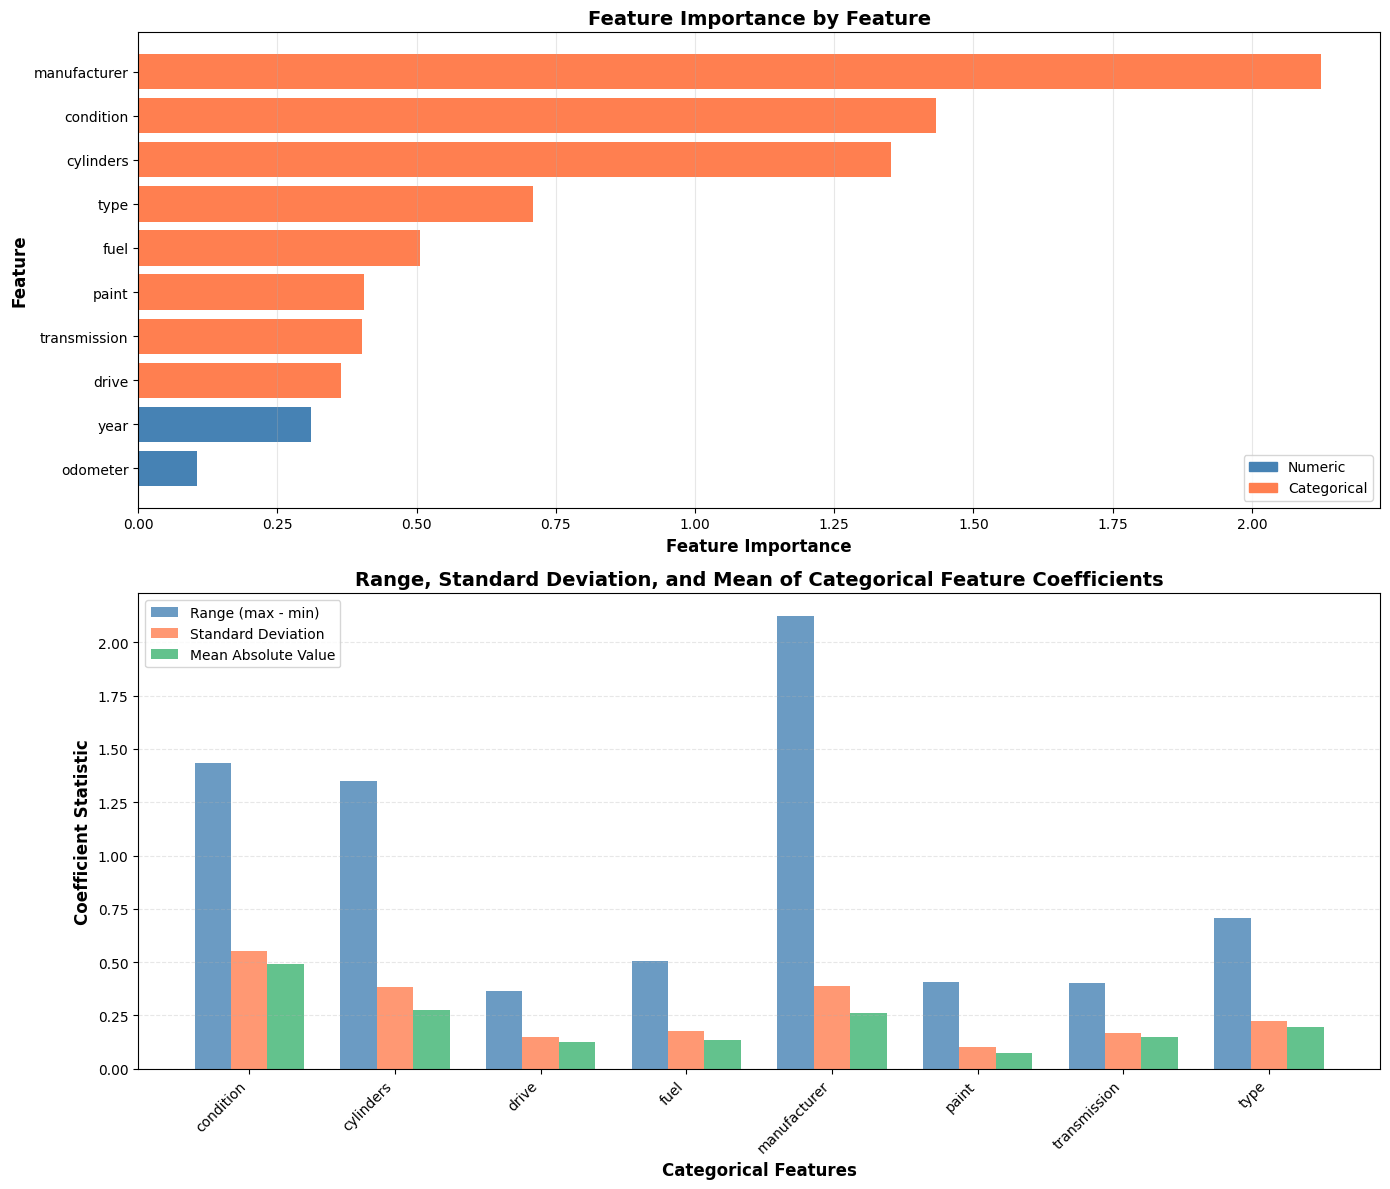

In [21]:
# Combined plot: Feature Importance (top) and Categorical Features Statistics (bottom)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# ========== TOP SUBPLOT: Feature Importance ==========
# Sort by importance for better visualization
importance_df_sorted = importance_df.sort_values('Importance', ascending=True)

# Create color mapping for numeric vs categorical
colors = ['steelblue' if t == 'Numeric' else 'coral' for t in importance_df_sorted['Type']]

# Create horizontal bar chart
ax1.barh(importance_df_sorted['Feature'], importance_df_sorted['Importance'], color=colors)

# Add labels and title
ax1.set_xlabel('Feature Importance', fontsize=12, fontweight='bold')
ax1.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax1.set_title('Feature Importance by Feature', fontsize=14, fontweight='bold')

# Add legend
from matplotlib.patches import Rectangle
ax1.legend(handles=[
    Rectangle((0,0),1,1, color='steelblue', label='Numeric'),
    Rectangle((0,0),1,1, color='coral', label='Categorical')
], loc='lower right')

# Add grid for easier reading
ax1.grid(axis='x', alpha=0.3)

# ========== BOTTOM SUBPLOT: Categorical Features Statistics ==========
# Get all categorical feature names (ensure they exist in all three dictionaries)
categorical_features = sorted(set(categorical_importance_range.keys()) | 
                             set(categorical_importance_std.keys()) | 
                             set(categorical_importance_mean_abs.keys()))

# Prepare data for grouped bar chart
x_pos = np.arange(len(categorical_features))
width = 0.25  # Width of bars

# Extract values for each metric
range_values = [categorical_importance_range.get(f, 0) for f in categorical_features]
std_values = [categorical_importance_std.get(f, 0) for f in categorical_features]
mean_values = [categorical_importance_mean_abs.get(f, 0) for f in categorical_features]

# Create grouped bars
bars1 = ax2.bar(x_pos - width, range_values, width, label='Range (max - min)', 
               color='steelblue', alpha=0.8)
bars2 = ax2.bar(x_pos, std_values, width, label='Standard Deviation', 
               color='coral', alpha=0.8)
bars3 = ax2.bar(x_pos + width, mean_values, width, label='Mean Absolute Value', 
               color='mediumseagreen', alpha=0.8)

# Customize the plot
ax2.set_xlabel('Categorical Features', fontsize=12, fontweight='bold')
ax2.set_ylabel('Coefficient Statistic', fontsize=12, fontweight='bold')
ax2.set_title('Range, Standard Deviation, and Mean of Categorical Feature Coefficients', 
             fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(categorical_features, rotation=45, ha='right')
ax2.legend(loc='upper left')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

In [24]:
# Linear Regression Model Performance: Train, Validation, and Test Errors

# Use the linear regression pipeline from cell 23 to get predictions on all three sets
# Make predictions (in log space)
y_train_pred_log = linear_pipe.predict(X_train)
y_val_pred_log = linear_pipe.predict(X_val)
y_test_pred_log = linear_pipe.predict(X_test)

# Calculate metrics in log space
train_mse_log = mean_squared_error(y_train, y_train_pred_log)
train_mae_log = mean_absolute_error(y_train, y_train_pred_log)
train_rmse_log = np.sqrt(train_mse_log)

val_mse_log = mean_squared_error(y_val, y_val_pred_log)
val_mae_log = mean_absolute_error(y_val, y_val_pred_log)
val_rmse_log = np.sqrt(val_mse_log)

test_mse_log = mean_squared_error(y_test, y_test_pred_log)
test_mae_log = mean_absolute_error(y_test, y_test_pred_log)
test_rmse_log = np.sqrt(test_mse_log)

# Convert predictions and actual values back to dollar space
y_train_price = np.expm1(y_train)
y_train_pred_price = np.expm1(y_train_pred_log)
y_val_price = np.expm1(y_val)
y_val_pred_price = np.expm1(y_val_pred_log)
y_test_price = np.expm1(y_test)
y_test_pred_price = np.expm1(y_test_pred_log)

# Calculate metrics in dollar space
train_mse_price = mean_squared_error(y_train_price, y_train_pred_price)
train_mae_price = mean_absolute_error(y_train_price, y_train_pred_price)
train_rmse_price = np.sqrt(train_mse_price)

val_mse_price = mean_squared_error(y_val_price, y_val_pred_price)
val_mae_price = mean_absolute_error(y_val_price, y_val_pred_price)
val_rmse_price = np.sqrt(val_mse_price)

test_mse_price = mean_squared_error(y_test_price, y_test_pred_price)
test_mae_price = mean_absolute_error(y_test_price, y_test_pred_price)
test_rmse_price = np.sqrt(test_mse_price)

# Create DataFrame with all metrics
linear_regression_errors = pd.DataFrame({
    'MSE (log)': [train_mse_log, val_mse_log, test_mse_log],
    'MAE (log)': [train_mae_log, val_mae_log, test_mae_log],
    'RMSE (log)': [train_rmse_log, val_rmse_log, test_rmse_log],
    'MSE ($)': [train_mse_price, val_mse_price, test_mse_price],
    'MAE ($)': [train_mae_price, val_mae_price, test_mae_price],
    'RMSE ($)': [train_rmse_price, val_rmse_price, test_rmse_price]
})
linear_regression_errors.index = ['Train', 'Validation', 'Test']

print("=" * 80)
print("LINEAR REGRESSION MODEL: TRAIN, VALIDATION, AND TEST ERRORS")
print("=" * 80)
display(linear_regression_errors)


LINEAR REGRESSION MODEL: TRAIN, VALIDATION, AND TEST ERRORS


,MSE (log),MAE (log),RMSE (log),MSE ($),MAE ($),RMSE ($)
Train,1.087908,0.575820,1.043028,1.170558e+08,7006.903185,10819.234237
Validation,1.086048,0.576010,1.042136,1.131330e+08,6934.109704,10636.400481
Test,1.094944,0.579339,1.046396,1.179508e+08,7030.523534,10860.516701
